In [763]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
from datetime import timedelta

In [765]:
data = pd.read_csv(r"contact_history_multiple.csv", encoding="utf-8", sep=";")

In [767]:
# Add the day of the week column
day_of_week = []
for i in range(len(data)):
    day_of_week.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M:%S').day_name())
data['day_of_week'] = day_of_week

In [769]:
distinct_engage = []
for i in range(len(data)):
    if (str(data["EventName"][i]) == 'Sent') and (data['HashMessage'][i] not in distinct_engage):
        distinct_engage.append(data['HashMessage'][i])

In [771]:
c = 0 # is the number of sms that has recieved + engaged event
for i in range(len(distinct_engage)):
    for j in range(len(data)):
        if (str(data["EventName"][j]) == 'Received') and (data['HashMessage'][j] == distinct_engage[i]):
            c += 1
            break

In [772]:
# here I computed that indeed some clicked mails do not have the Open event
len(distinct_engage), c

(667, 480)

In [773]:
clicked_mails_that_do_not_have_open_event = len(distinct_engage) - c

In [774]:
clicked_mails_that_do_not_have_open_event

187

In [775]:
# number of distict opened sms is length of 'list_contact_concatenated_mex'
list_contact_concatenated_mex = []
for i in range(len(data)):
    if (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContact'][i] + data['HashMessage'][i])

In [776]:
len(list_contact_concatenated_mex)

495

In [783]:
wa = data.loc[data["EventName"] == 'Received']
(len(wa.groupby(['HashMessage','HashContact']).count()) / len(data.loc[data["EventName"] == 'Sent'])) * 100

71.01865136298422

In [785]:
len(wa.groupby(['HashMessage'])) / len(data.loc[data["EventName"] == 'Sent']) * 100

68.86657101865137

In [787]:
# % clicked mails
wa = data.loc[data["EventName"] == 'Engaged']
len(wa.groupby(['HashMessage','HashContact']).count()) / len(data.loc[data["EventName"] == 'Sent']) * 100

33.572453371592545

In [789]:
 len(data.loc[data["EventName"] == 'Sent']) 

697

In [791]:
 len(data.loc[data["EventName"] == 'Received']) 

495

In [793]:
 len(data.loc[data["EventName"] == 'Engaged']) 

234

In [795]:
 len(data.loc[data["EventName"] == 'Sent']) - len(data.loc[data["EventName"] == 'Received']) 

202

In [797]:
# % distinct opened sms per CampaignName
dk = {}
for i in data["CampaignName"].unique():
    dk[i] = 0
list_contact_concatenated_mex = []
for i in range(len(data)):
    if (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContact'][i] + data['HashMessage'][i])
        dk[data["CampaignName"][i]] += 1

In [799]:
dk

{'Flash Sale': 122,
 'New Arrivals': 94,
 'Winter Promo': 136,
 'Holiday Discount': 143}

In [801]:
dk_values_list = list(dk.values())
for i in range(len(dk_values_list)):
    dk_values_list[i] = (dk_values_list[i] / len(list_contact_concatenated_mex)) * 100

In [803]:
dk_values_list

[24.646464646464647, 18.98989898989899, 27.474747474747474, 28.888888888888886]

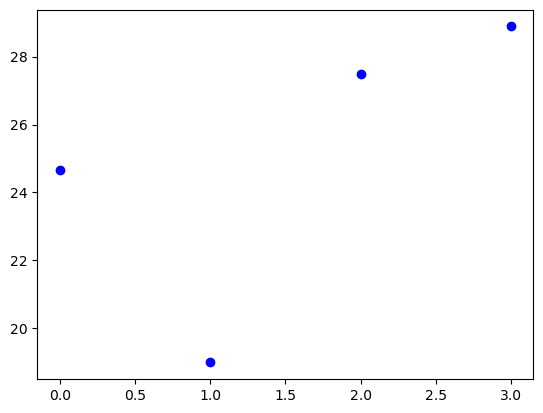

In [805]:
plt.plot(range(0, len(dk_values_list)), dk_values_list, 'bo')
plt.show()

In [807]:
# campaign types
data["CampaignName"].unique()

array(['Flash Sale', 'New Arrivals', 'Winter Promo', 'Holiday Discount'],
      dtype=object)

In [809]:
# top campaign name
data["CampaignName"].unique()[np.argmax(dk_values_list)]

'Holiday Discount'

In [811]:
# top campaign name
data["CampaignName"].unique()[np.argmin(dk_values_list)]

'New Arrivals'

In [813]:
# % distinct opened sms per subject

dj = {}
for i in data["Subject"].unique():
    dj[i] = 0
list_contact_concatenated_mex_subj = []
for i in range(len(data)):
    if (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex_subj):
        list_contact_concatenated_mex_subj.append(data['HashContact'][i] + data['HashMessage'][i])
        dj[data["Subject"][i]] += 1

In [815]:
dj_values_list = list(dj.values())
for i in range(len(dj_values_list)):
    dj_values_list[i] = (dj_values_list[i] / len(list_contact_concatenated_mex_subj)) * 100

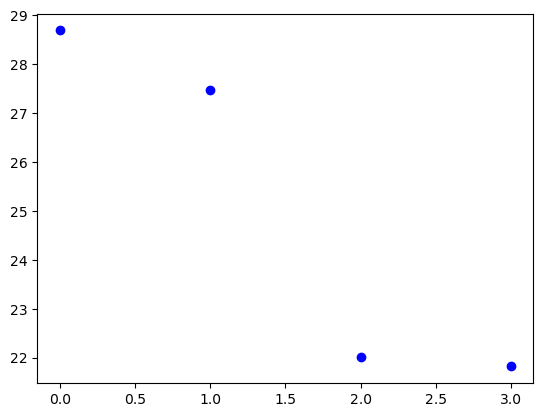

In [817]:
plt.plot(range(0, len(dj_values_list)), dj_values_list, 'bo')
plt.show()

In [819]:
sum(dj_values_list)

100.0

In [821]:
# top 2 SUBJECT
data["Subject"].unique()[np.argmax(dj_values_list)], data["Subject"].unique()[np.argsort(dj_values_list)[-2]]

('Exclusive Deals Just for You!', 'Check Out Our New Products!')

In [823]:
# top 2 SUBJECT %
dj_values_list[np.argmax(dj_values_list)], dj_values_list[np.argsort(dj_values_list)[-2]]

(28.68686868686869, 27.474747474747474)

In [825]:
test_if_all_rows_are_equal = data.loc[data['HashContact'] == data['HashContact'][0]].head(4)

In [827]:
test_if_all_rows_are_equal.iloc[0]

EventName                                     Sent
EventDate                      2025-01-04 11:37:00
HashMessage                                msg5641
HashContact                            contact1107
CampaignName                            Flash Sale
CommunicationName                  Monthly Updates
Subject              Exclusive Deals Just for You!
day_of_week                               Saturday
Name: 0, dtype: object

In [829]:
test_if_all_rows_are_equal.iloc[1]

EventName                                   Sent
EventDate                    2025-01-05 04:54:00
HashMessage                              msg2270
HashContact                          contact1107
CampaignName                        New Arrivals
CommunicationName              Limited Time Deal
Subject              Check Out Our New Products!
day_of_week                               Sunday
Name: 1, dtype: object

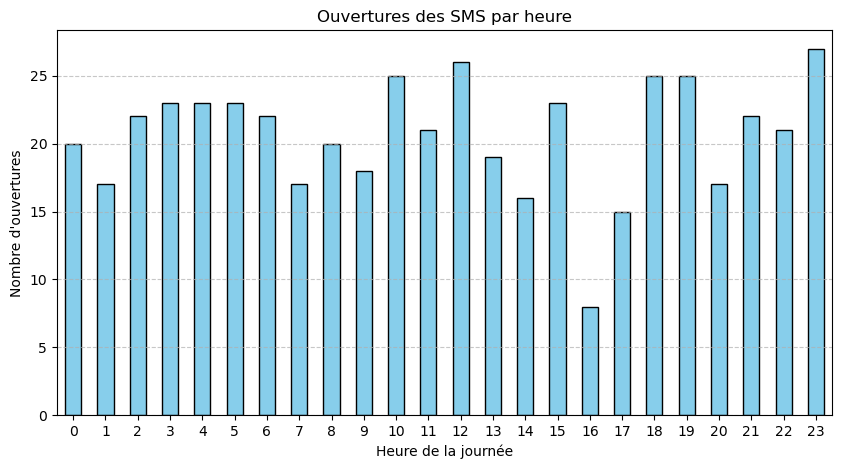

In [831]:
data.columns = data.columns.str.strip()
data['EventDate'] = pd.to_datetime(data['EventDate'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
# pour compter les occurences de chaque heure d'ouverture de sms 
filtered_data = data.loc[(data['EventName'] == 'Received') & data['EventDate'].notna(), 'EventDate']
hourly_counts = filtered_data.dt.hour.value_counts().sort_index()
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre d'ouvertures")
plt.title("Ouvertures des SMS par heure")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [833]:
open_sms_per_hour = list(df.groupby(df["date"].dt.hour).count()['date'])

In [835]:
sum(open_sms_per_hour)

697

In [837]:
open_sms_per_hour[np.argmax(open_sms_per_hour)] / np.sum(open_sms_per_hour) * 100 # are all the NON DISTINCT opened mails

5.308464849354376

In [839]:
open_sms_per_hour[np.argsort(open_sms_per_hour)[-2]] / np.sum(open_sms_per_hour) * 100

5.308464849354376

In [841]:
open_sms_per_hour[np.argsort(open_sms_per_hour)[-3]] / np.sum(open_sms_per_hour) * 100

5.308464849354376

<Axes: xlabel='date'>

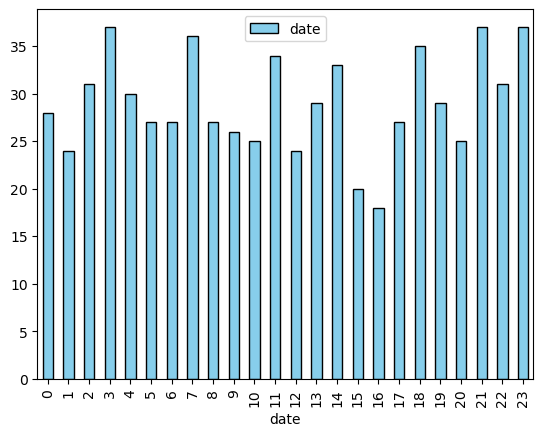

In [843]:
sent_sms_list = [] # based on the hour of EVENT.DATE
for i in range(len(data)):
    if "nan" not in str(data["EventName"][i]) and str(data["EventName"][i]) == 'Sent':
        sent_sms_list.append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
df = pd.DataFrame(sent_sms_list, columns =['date'])
df.groupby(df["date"].dt.hour).count().plot(kind="bar",color="skyblue", edgecolor="black")



In [845]:
sent_sms_per_hour = list(df.groupby(df["date"].dt.hour).count()['date'])

In [847]:
sum(sent_sms_per_hour)

697

In [849]:
sent_sms_per_hour[np.argmax(sent_sms_per_hour)] / np.sum(sent_sms_per_hour) * 100

5.308464849354376

In [851]:
sent_sms_per_hour[np.argsort(sent_sms_per_hour)[-2]] / np.sum(sent_sms_per_hour) * 100

5.308464849354376

In [853]:
sent_sms_per_hour[np.argsort(sent_sms_per_hour)[-3]] / np.sum(sent_sms_per_hour) * 100

5.308464849354376

In [855]:
df=df.assign(session=pd.cut(df["date"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

<Axes: xlabel='session'>

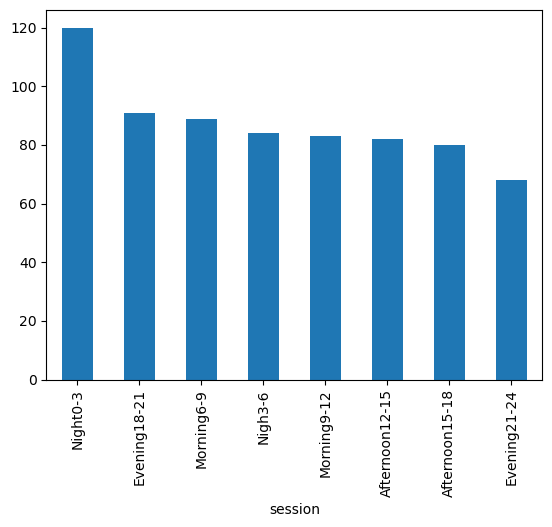

In [857]:
df['session'].value_counts().plot.bar()

In [859]:
df['session'].value_counts().iloc[0] / df['session'].value_counts().sum() * 100


17.216642754662843

In [861]:
df['session'].value_counts().iloc[1] / df['session'].value_counts().sum() * 100

13.055954088952653

In [863]:
df['session'].value_counts().iloc[2] / df['session'].value_counts().sum() * 100

12.769010043041607

In [865]:
df['session'].value_counts().iloc[3] / df['session'].value_counts().sum() * 100

12.051649928263988

In [867]:
df['session'].value_counts().iloc[4] / df['session'].value_counts().sum() * 100

11.908177905308465

In [869]:
df['session'].value_counts().iloc[5] / df['session'].value_counts().sum() * 100

11.76470588235294

In [871]:
df['session'].value_counts().iloc[6] / df['session'].value_counts().sum() * 100

11.477761836441895

In [873]:
df['session'].value_counts().iloc[7] / df['session'].value_counts().sum() * 100

9.75609756097561

In [875]:
open_sms_list = [] # based on the hour of EVENT.DATE
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Received':
        open_sms_list.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
df = pd.DataFrame(open_sms_list, columns =['date'])

In [877]:
df=df.assign(session=pd.cut(df["date"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

<Axes: xlabel='session'>

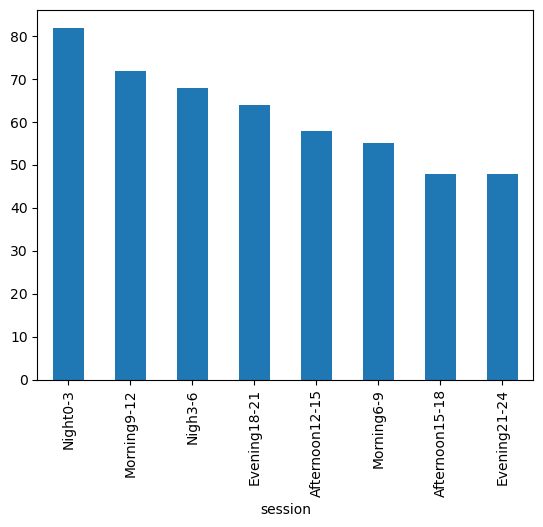

In [879]:
df['session'].value_counts().plot.bar()

In [881]:
df['session'].value_counts().iloc[0] / df['session'].value_counts().sum() * 100

16.565656565656568

In [883]:
df['session'].value_counts().iloc[1] / df['session'].value_counts().sum() * 100

14.545454545454545

In [885]:
df['session'].value_counts().iloc[2] / df['session'].value_counts().sum() * 100

13.737373737373737

In [887]:
df['session'].value_counts().iloc[3] / df['session'].value_counts().sum() * 100

12.929292929292929

In [889]:
df['session'].value_counts().iloc[4] / df['session'].value_counts().sum() * 100

11.717171717171718

In [891]:
df['session'].value_counts().iloc[5] / df['session'].value_counts().sum() * 100

11.11111111111111

In [893]:
df['session'].value_counts().iloc[6] / df['session'].value_counts().sum() * 100

9.696969696969697

In [895]:
df['session'].value_counts().iloc[7] / df['session'].value_counts().sum() * 100

9.696969696969697

-------------------------------------------------------------------

In [898]:
data["HashContact"].nunique()

65

In [900]:
data['CampaignName'].nunique()

4

In [902]:
data["HashMessage"].nunique()

667

In [904]:
d = {}
for i in data["HashContact"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Received': 0, 'Engaged': 0}

In [906]:
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EventName"][i]) == 'Sent':
        d[data["HashContact"][i]]['Sent'] += 1
    elif (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContact'][i] + data['HashMessage'][i])
        d[data["HashContact"][i]]['Received'] += 1
    elif str(data["EventName"][i]) == 'Engaged':
        d[data["HashContact"][i]]['Engaged'] += 1
    else:
        pass

In [908]:
d['contact1161']

{'Sent': 4, 'Received': 4, 'Engaged': 1}

In [910]:
o = []
for key, value in d.items():
    o.append(value['Received'] / value['Sent'])

In [912]:
np.mean(o), np.std(o)

(0.7030965238883792, 0.13041783781111013)

In [914]:
c2 = 0
o2 = 0
s2 = 0
for key, value in d.items():
    c2 += value['Engaged']
    o2 += value['Received']
    s2 += value['Sent']

In [916]:
(o2 / s2)

0.7101865136298422

In [918]:
data["CommunicationName"].nunique(), data["Subject"].nunique()

(4, 4)

In [920]:
def distribution_mex_for_comm_with_day(day_of_week=None, comm_name=None):
    counter_mex_comm_for_day = 0
    list_hash_mex = [] # this is needed for take the distinct communications
    if day_of_week is not None:
        for i in range(len(data)):
            if data["HashMessage"][i] not in list_hash_mex and data['EventName'][i] == 'Sent' and data['day_of_week'][i] == day_of_week and data["CommunicationName"][i] == comm_name:
                list_hash_mex.append(data["HashMessage"][i])
                counter_mex_comm_for_day += 1

        return counter_mex_comm_for_day
    else:
        d3 = {}
        for i in data["CommunicationName"].unique():
            if i not in d3:
                d3[i] = 0
        list_hash_mex = [] # this is needed for take the distinct communications
        for i in range(len(data)):
            if data["HashMessage"][i] not in list_hash_mex:
                list_hash_mex.append(data["HashMessage"][i])
                d3[data["CommunicationName"][i]] += 1
        return list(d3.values())
    
def plot_distribution_mex_for_comm_with_day(out):
    if type(out) is list:
        plt.plot(range(0, len(out)), out, 'bo')
        plt.show()
    else:
        print(out)

In [922]:
data['day_of_week'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Friday', 'Wednesday', 'Thursday',
       'Tuesday'], dtype=object)

In [924]:
out = distribution_mex_for_comm_with_day(day_of_week='Wednesday', comm_name=data["CommunicationName"].unique()[0])
plot_distribution_mex_for_comm_with_day(out)

49


In [926]:
out2 = distribution_mex_for_comm_with_day() # all

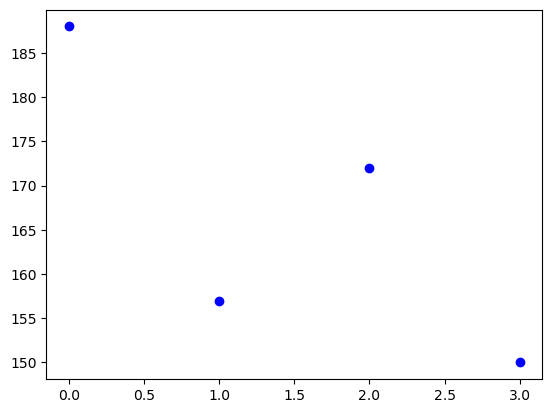

In [928]:
plot_distribution_mex_for_comm_with_day(out2)

In [930]:
d4 = {}
for i in data["HashMessage"].unique():
    if i not in d4:
        d4[i] = {'Sent': 'null', 'Received': []}

In [932]:
for i in range(len(data)):
    if str(data["EventName"][i]) == 'Sent':
        d4[data["HashMessage"][i]]['Sent'] = pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M')
    elif str(data["EventName"][i]) == 'Received':
        d4[data["HashMessage"][i]]['Received'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
    else:
        pass

In [934]:
d4['msg9968']

{'Sent': Timestamp('2025-01-01 18:06:00'),
 'Received': [Timestamp('2025-01-01 18:44:00')]}

In [936]:
d4 = {}
# 1. Traitement des messages
for msg in data["HashMessage"].unique():
    msg_data = data[data["HashMessage"] == msg]
    
    # Date d'envoi (on garde la plus ancienne si plusieurs 'Sent')
    sent_date = msg_data[msg_data["EventName"] == "Sent"]["EventDate"].min()
    
    # Date d'ouverture/reçu (on garde la plus ancienne 'Received' qui est après 'Sent')
    received_dates = msg_data[msg_data["EventName"] == "Received"]["EventDate"]
    valid_received = [d for d in received_dates if pd.to_datetime(d) > pd.to_datetime(sent_date)]
    oldest_received = min(valid_received) if valid_received else None
    
    d4[msg] = {
        'Sent': pd.to_datetime(sent_date) if not pd.isnull(sent_date) else None,
        'Received': pd.to_datetime(oldest_received) if oldest_received else None
    }
# 2. Calcul des délais d'ouverture
deltas = []
for msg, dates in d4.items():
    if dates['Sent'] and dates['Received']:
        delta = dates['Received'] - dates['Sent']
        deltas.append(delta)

# 3. Calcul de la moyenne
if deltas:
    mean_delta = sum(deltas, timedelta(0)) / len(deltas)
    print(f"Average time between sending and opening: {mean_delta}")
else:
    print("No valid sent→opened pairs found")

# Example output for one message
print("\nExample for one message:")
print(d4.get('msg9968', "Message not found"))

Average time between sending and opening: 0 days 01:48:15.375000

Example for one message:
{'Sent': Timestamp('2025-01-01 18:06:00'), 'Received': Timestamp('2025-01-01 18:44:00')}


In [937]:
# get hours
hours_list = []
for i in range(len(list_deltas_open_minus_sent)):
    hours_list.append((list_deltas_open_minus_sent[i].days*24) + list_deltas_open_minus_sent[i].seconds//3600)

In [938]:
# all the number greater than 48 make it equal to 48
for i in range(len(hours_list)):
    if hours_list[i] > 48:
        hours_list[i] = 48

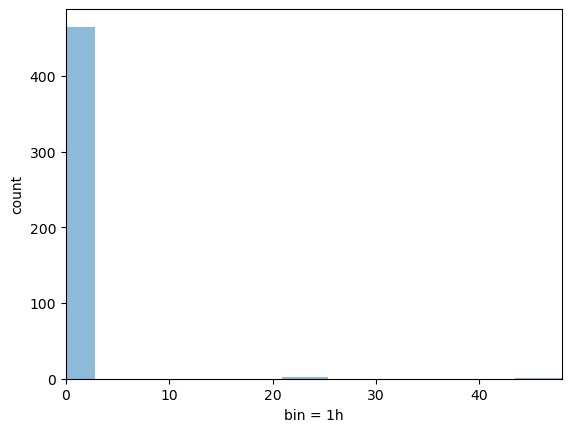

In [942]:
bins = 48
plt.xlim([0, 48])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

In [944]:
d5 = {}
for i in data["HashMessage"].unique():
    if i not in d5:
        d5[i] = {'Received': [], 'Engaged': []}
communication_name = data['CommunicationName'].unique()[3]

In [946]:
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Received':
        d5[data["HashMessage"][i]]['Received'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
    elif "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Engaged':
        d5[data["HashMessage"][i]]['Engaged'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
    else:
        pass

In [948]:
# delete record with 'Open' == null or 'Click' == []
d6 = {}
for k, v in d5.items():
    if (v['Engaged'] != []) and v['Received'] != []:
        d6[k] = {'Received':v['Received'], 'Engaged':v['Engaged']}
        

In [950]:
# preserve the oldest 'Click' date and delete the others
for i in data["HashMessage"].unique():
    if i in d6:
        timestamp_click_list = d6[i]['Engaged']
        oldest = None
        for j in timestamp_click_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d6[i]['Engaged'] = oldest
        # among the 'Open' timestamps, take the oldest
        timestamp_open_list = d6[i]['Received']
        oldest = None
        for j in timestamp_open_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d6[i]['Received'] = oldest

In [952]:
# get differences between 'Click' and 'Open'
list_deltas_click_minus_open = []
for i in data["HashMessage"].unique():
    if (i in d6):
        list_deltas_click_minus_open.append(d6[i]['Engaged'] - d6[i]['Received'])

In [954]:
# get hours
hours_list = []
for i in range(len(list_deltas_click_minus_open)):
    hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

In [956]:
# all the number greater than 48 make it equal to 48
for i in range(len(hours_list)):
    if hours_list[i] > 48:
        hours_list[i] = 48
    if hours_list[i] < 0: # excluding click date < open date
        hours_list[i] = 0

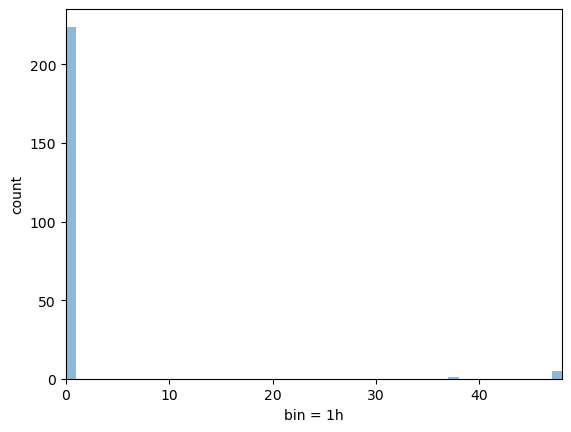

In [958]:
from matplotlib import pyplot as plt

bins = 48
plt.xlim([0, 48])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

In [960]:
mean_open_click = list_deltas_click_minus_open[0]
for i in range(1, len(list_deltas_click_minus_open)):
    mean_open_click += list_deltas_click_minus_open[i]
mean_open_click / len(list_deltas_click_minus_open)

Timedelta('0 days 02:50:04.434782608')

In [962]:
from matplotlib import pyplot as plt
# TODO: adapt this function to the others
def apertura_per_fascia_oraria(name, comm_or_camp=None):
    d = {}
    for i in data["HashMessage"].unique():
        if i not in d:
            d[i] = {'Sent': 'null', 'Received': []}

    if name == 'all': # if is 'all' it does not matter the 'comm_or_camp'
        for i in range(len(data)):
            if str(data["EventName"][i]) == 'Sent':
                d[data["HashMessage"][i]]['Sent'] = pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M')
            elif str(data["EventName"][i]) == 'Received':
                d[data["HashMessage"][i]]['Received'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'communication':
        for i in range(len(data)):
            if str(data["EventName"][i]) == 'Sent' and data['CommunicationName'][i] == name:
                d[data["HashMessage"][i]]['Sent'] = pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M')
            elif str(data["EventName"][i]) == 'Received' and data['CommunicationName'][i] == name:
                d[data["HashMessage"][i]]['Received'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'campaign':
        for i in range(len(data)):
            if str(data["EventName"][i]) == 'Sent' and data['CampaignName'][i] == name:
                d[data["HashMessage"][i]]['Sent'] = pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M')
            elif str(data["EventName"][i]) == 'Received' and data['CampaignName'][i] == name:
                d[data["HashMessage"][i]]['Received'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
            else:
                pass
    else:
        raise Exception(str(name) + " does not exists in "+ str(comm_or_camp))

    # preserve the oldest 'Open' date and delete the others
    for i in data["HashMessage"].unique():
        timestamp_open_list = d[i]['Received']
        oldest = None
        for j in timestamp_open_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d[i]['Received'] = oldest

    # get differences between 'Open' and 'Sent'
    list_deltas_open_minus_sent_comm = []
    for i in data["HashMessage"].unique():
        if d[i]['Received'] is not None:
            list_deltas_open_minus_sent_comm.append(d[i]['Received'] - d[i]['Sent'])

    # get hours
    hours_list = []
    for i in range(len(list_deltas_open_minus_sent_comm)):
        hours_list.append((list_deltas_open_minus_sent_comm[i].days*24) + list_deltas_open_minus_sent_comm[i].seconds//3600)

    # all the number greater than 48 make it equal to 48
    for i in range(len(hours_list)):
        if hours_list[i] > 48:
            hours_list[i] = 48

    return hours_list

In [964]:
def click_per_fascia_oraria(name, comm_or_camp=None):
    d5 = {}
    for i in data["HashMessage"].unique():
        if i not in d5:
            d5[i] = {'Receievd': [], 'Engaged': []}
        
    if name == 'all':
        for i in range(len(data)):
            if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Receievd':
                d5[data["HashMessage"][i]]['Receievd'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Engaged':
                d5[data["HashMessage"][i]]['Engaged'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass

    elif comm_or_camp == 'communication':
        for i in range(len(data)):
            if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Receievd' and data['CommunicationName'][i] == name:
                d5[data["HashMessage"][i]]['Receievd'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Engaged' and data['CommunicationName'][i] == name:
                d5[data["HashMessage"][i]]['Engaged'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    elif comm_or_camp == 'campaign':
        for i in range(len(data)):
            if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Receievd' and data['CampaignName'][i] == name:
                d5[data["HashMessage"][i]]['Receievd'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            elif "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Engaged' and data['CampaignName'][i] == name:
                d5[data["HashMessage"][i]]['Engaged'].append(pd.to_datetime(data["EventDate"][i], format='%Y/%m/%d %H:%M'))
            else:
                pass
    else:
        raise Exception(str(name) + " does not exists in "+ str(comm_or_camp))


    # delete record with 'Open' == null or 'Click' == []
    d6 = {}
    for k, v in d5.items():
        if (v['Engaged'] != []) and v['Receievd'] != []:
            d6[k] = {'Receievd':v['Receievd'], 'Engaged':v['Engaged']}


    # preserve the oldest 'Click' date and delete the others
    for i in data["HashMessage"].unique():
        if i in d6:
            timestamp_click_list = d6[i]['Engaged']
            oldest = None
            for j in timestamp_click_list:
                if oldest is None:
                    oldest = j
                elif j < oldest:
                    oldest = j
            d6[i]['Engaged'] = oldest
            # among the 'Open' timestamps, take the oldest
            timestamp_open_list = d6[i]['Receievd']
            oldest = None
            for j in timestamp_open_list:
                if oldest is None:
                    oldest = j
                elif j < oldest:
                    oldest = j
            d6[i]['Receievd'] = oldest

    # get differences between 'Click' and 'Open'
    list_deltas_click_minus_open = []
    for i in data["HashMessage"].unique():
        if (i in d6):
            list_deltas_click_minus_open.append(d6[i]['Engaged'] - d6[i]['Received'])
    
    # get hours
    hours_list = []
    for i in range(len(list_deltas_click_minus_open)):
        hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

    # all the number greater than 48 make it equal to 48
    for i in range(len(hours_list)):
        if hours_list[i] > 48:
            hours_list[i] = 48
        if hours_list[i] < 0: # excluding click date < open date
            hours_list[i] = 0

    return hours_list

In [966]:
data['CampaignName'].unique()

array(['Flash Sale', 'New Arrivals', 'Winter Promo', 'Holiday Discount'],
      dtype=object)

In [968]:
data['CommunicationName'].unique()

array(['Monthly Updates', 'Limited Time Deal', 'Product Launch',
       'Special Invitation'], dtype=object)

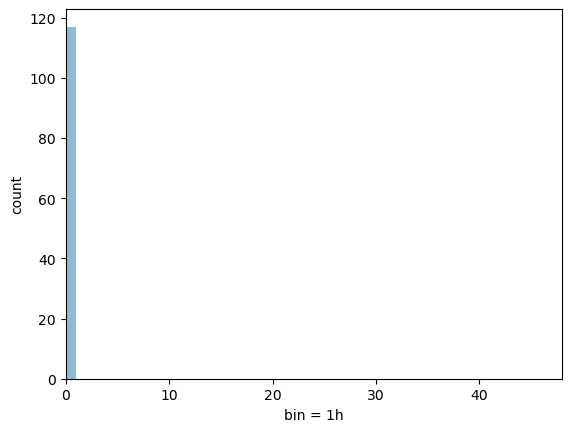

In [970]:
camp0_open = apertura_per_fascia_oraria(data['CommunicationName'].unique()[1], comm_or_camp = 'communication')
bins = 48
plt.xlim([0, 48])
plt.hist(camp0_open, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

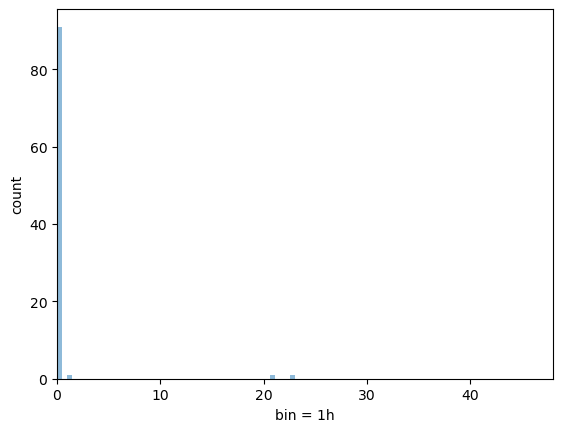

In [972]:
camp1_open = apertura_per_fascia_oraria(data['CampaignName'].unique()[1], comm_or_camp = 'campaign')
bins = 48
plt.xlim([0, 48])
plt.hist(camp1_open, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

In [973]:
# get hours
hours_list = []
for i in range(len(list_deltas_click_minus_open)):
    hours_list.append((list_deltas_click_minus_open[i].days*24) + list_deltas_click_minus_open[i].seconds//3600)

In [974]:
# all the number greater than 24 make it equal to 24
for i in range(len(hours_list)):
    if hours_list[i] > 24:
        hours_list[i] = 24
    if hours_list[i] < 0: # excluding click date < open date
        hours_list[i] = 0

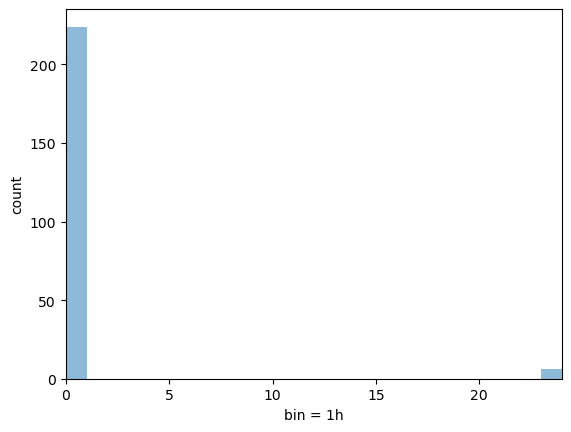

In [975]:
from matplotlib import pyplot as plt

bins = 24
plt.xlim([0, 24])
plt.hist(hours_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 1h')
plt.ylabel('count')

plt.show()

In [976]:
d7 = {}
for i in data["HashContact"].unique():
    if i not in d7:
        d7[i] = {'OpenOldest': [], 'OpenNewest': []}

In [980]:
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Received':
        d7[data["HashContact"][i]]['OpenOldest'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
        d7[data["HashContact"][i]]['OpenNewest'].append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
    else:
        pass

In [984]:
# preserve the oldest 'Open' date and delete the others
for i in data["HashContact"].unique():
    if i in d7:
        # keep the oldest
        timestamp_open_oldest_list = d7[i]['OpenOldest']
        oldest = None
        for j in timestamp_open_oldest_list:
            if oldest is None:
                oldest = j
            elif j < oldest:
                oldest = j
        d7[i]['OpenOldest'] = oldest
        # keep the newest
        timestamp_open_newest_list = d7[i]['OpenNewest']
        newest = None
        for j in timestamp_open_newest_list:
            if newest is None:
                newest = j
            elif j > newest:
                newest = j
        d7[i]['OpenNewest'] = newest

In [986]:
# get differences between 'OpenNewest' and 'OpenOldest'
list_deltas_opens_newest_minus_open_oldest = []
for i in data["HashContact"].unique():
    if (i in d7) and (d7[i]['OpenNewest'] is not None) and (d7[i]['OpenOldest'] is not None):
        list_deltas_opens_newest_minus_open_oldest.append(d7[i]['OpenNewest'] - d7[i]['OpenOldest'])

In [988]:
# numero di contatti che hanno aperto almeno due mail, che quindi vengono presi in considerazione per il calolo
# del lifetime
len(list_deltas_opens_newest_minus_open_oldest)

65

In [990]:

# Initialize dictionary
d7 = {}
for contact in data["HashContact"].unique():
    d7[contact] = {'OpenOldest': [], 'OpenNewest': []}


In [992]:
# Process opening dates
for i in range(len(data)):
    if (not pd.isna(data["EventDate"][i])) and (data["EventName"][i] == 'Received'):
        contact = data["HashContact"][i]
        event_date = pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M')
        d7[contact]['OpenOldest'].append(event_date)
        d7[contact]['OpenNewest'].append(event_date)


In [994]:

# Calculate oldest/newest dates
for contact in d7:
    if d7[contact]['OpenOldest']:  # If list is not empty
        d7[contact]['OpenOldest'] = min(d7[contact]['OpenOldest'])
        d7[contact]['OpenNewest'] = max(d7[contact]['OpenNewest'])
    else:
        d7[contact]['OpenOldest'] = None
        d7[contact]['OpenNewest'] = None


In [996]:
# Calculate time deltas
time_deltas = []
for contact in d7:
    if d7[contact]['OpenNewest'] is not None and d7[contact]['OpenOldest'] is not None:
        delta = d7[contact]['OpenNewest'] - d7[contact]['OpenOldest']
        if delta > pd.Timedelta(0):  # Only include positive deltas
            time_deltas.append(delta)


In [998]:
# Display results
print(f"Contacts with at least two opens: {len(time_deltas)}")

if not time_deltas:
    print("Warning: No valid time deltas available!")
else:
    avg_delta = sum(time_deltas, pd.Timedelta(0)) / len(time_deltas)
    print(f"Average time between first and last open: {avg_delta}")
    
    # Additional statistics
    min_delta = min(time_deltas)
    max_delta = max(time_deltas)
    print(f"Fastest re-open: {min_delta}")
    print(f"Longest delay: {max_delta}")

Contacts with at least two opens: 64
Average time between first and last open: 7 days 23:55:01.875000
Fastest re-open: 1 days 18:32:00
Longest delay: 10 days 19:48:00


In [1000]:
# get days
days_list = []
for i in range(len(list_deltas_opens_newest_minus_open_oldest)):
    days_list.append(list_deltas_opens_newest_minus_open_oldest[i].days)

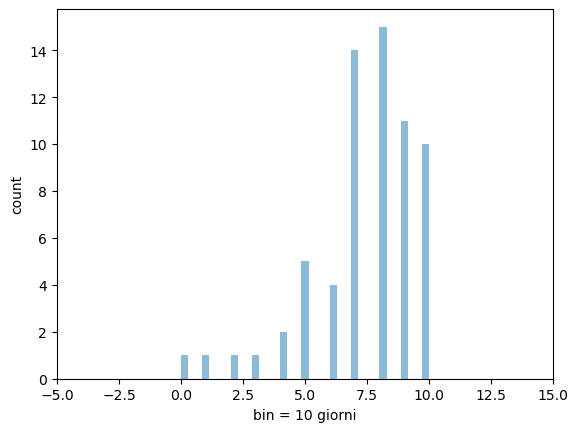

In [1002]:
from matplotlib import pyplot as plt

bins = 35
plt.xlim([min(days_list)-5, max(days_list)+5])
plt.hist(days_list, bins=bins, alpha=0.5)
plt.xlabel('bin = 10 giorni')
plt.ylabel('count')

plt.show()

<Axes: xlabel='session'>

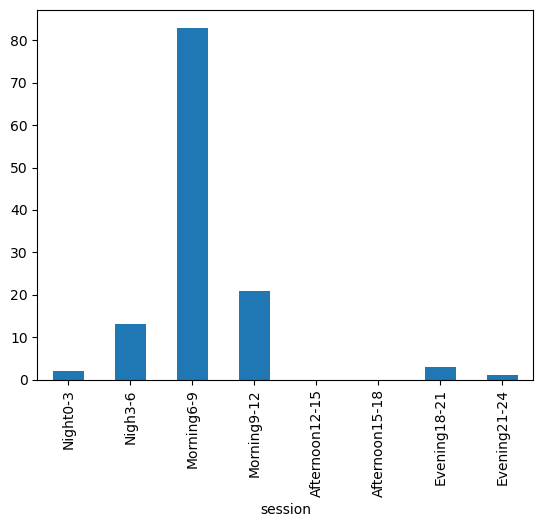

In [1004]:
hash_messages_sent_mail_list_6_9 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent' and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) >= 6) and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) <= 9):
        hash_messages_sent_mail_list_6_9.append(data["HashMessage"][i])
        
dates_6_9 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and (data["HashMessage"][i] in hash_messages_sent_mail_list_6_9):
        dates_6_9.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
        
df = pd.DataFrame(dates_6_9, columns =['dates_6_9'])
df=df.assign(session=pd.cut(df["dates_6_9"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))
df['session'].value_counts().sort_index().plot.bar()

In [1005]:
percentage = (df['session'].value_counts().iloc[0] / df['session'].value_counts().sum()) * 100
print(f"{percentage:.2f}%")

67.48%


<Axes: xlabel='session2'>

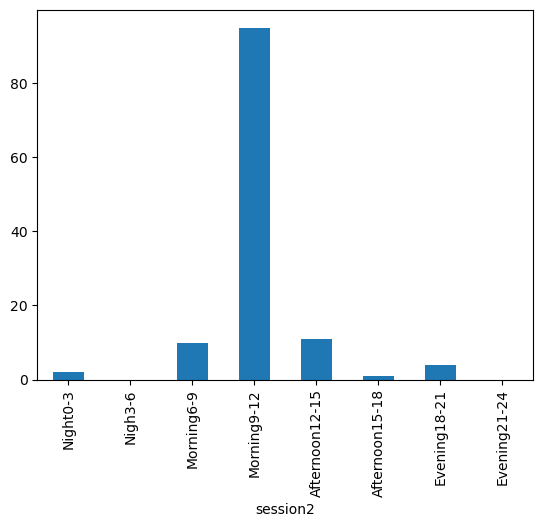

In [1008]:
hash_messages_sent_mail_list_9_12 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent' and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) >= 9) and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) <= 12):
        hash_messages_sent_mail_list_9_12.append(data["HashMessage"][i])
        
dates_9_12 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and (data["HashMessage"][i] in hash_messages_sent_mail_list_9_12):
        dates_9_12.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
        
df2 = pd.DataFrame(dates_9_12, columns =['dates_9_12'])

df2 = df2.assign(session2=pd.cut(df2["dates_9_12"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df2['session2'].value_counts().sort_index().plot.bar()

In [1010]:
percentage = (df2['session2'].value_counts().iloc[0] / df2['session2'].value_counts().sum()) * 100
print(f"{percentage:.2f}%")

77.24%


<Axes: xlabel='session3'>

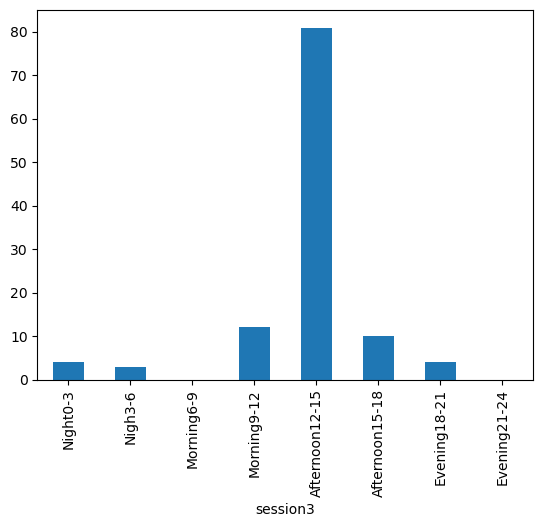

In [1012]:
hash_messages_sent_mail_list_12_15 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent' and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) >= 12) and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) <= 15):
        hash_messages_sent_mail_list_12_15.append(data["HashMessage"][i])
        
dates_12_15 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and (data["HashMessage"][i] in hash_messages_sent_mail_list_12_15):
        dates_12_15.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
        
df3 = pd.DataFrame(dates_12_15, columns =['dates_12_15'])

df3 = df3.assign(session3=pd.cut(df3["dates_12_15"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df3['session3'].value_counts().sort_index().plot.bar()

In [1014]:
percentage = df3['session3'].value_counts(normalize=True).iloc[0] * 100
print(f"{percentage:.2f}%")

71.05%


<Axes: xlabel='session4'>

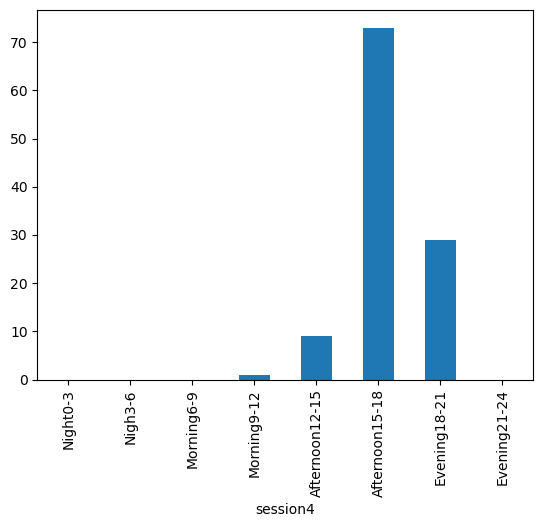

In [1016]:
hash_messages_sent_mail_list_15_18 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent' and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) >= 15) and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) <= 18):
        hash_messages_sent_mail_list_15_18.append(data["HashMessage"][i])
        
dates_15_18 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and (data["HashMessage"][i] in hash_messages_sent_mail_list_15_18):
        dates_15_18.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
        
df4 = pd.DataFrame(dates_15_18, columns =['dates_15_18'])

df4 = df4.assign(session4=pd.cut(df4["dates_15_18"].dt.hour,
                            [0,3,6,9,12,15,18,21,24],
                            labels=['Night0-3','Nigh3-6','Morning6-9','Morning9-12','Afternoon12-15','Afternoon15-18','Evening18-21', 'Evening21-24'],
                            include_lowest=True))

df4['session4'].value_counts().sort_index().plot.bar()

In [1017]:
percentage = df4['session4'].value_counts(normalize=True).iloc[0] * 100
print(f"{percentage:.2f}%")

65.18%


In [1020]:
def fasce_orarie(first, second, day_of_week=None):
    hash_messages_sent_mail_list = []
    
    for i in range(len(data)):
        if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent' and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) >= first) and ((pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').hour) <= second):
            hash_messages_sent_mail_list.append(data["HashMessage"][i])
    dates = []
    if day_of_week is not None:
        for i in range(len(data)):
            if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and data['day_of_week'][i] == day_of_week and (data["HashMessage"][i] in hash_messages_sent_mail_list):
                dates.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))
    else:
        for i in range(len(data)):
            if "nan" not in str(data["EventDate"][i]) and (str(data["EventName"][i]) == 'Received' or str(data["EventName"][i]) == 'Engaged') and (data["HashMessage"][i] in hash_messages_sent_mail_list):
                dates.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M'))

    df = pd.DataFrame(dates, columns =['dates'])

    df = df.assign(session=pd.cut(df["dates"].dt.hour,
                                [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24],
                                labels=['0-1','1-2','2-3','3-4','4-5','5-6','6-7', '7-8', '8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24'],
                                include_lowest=True))

    return df['session'].value_counts().sort_index()
    

In [1022]:
data['day_of_week'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Friday', 'Wednesday', 'Thursday',
       'Tuesday'], dtype=object)

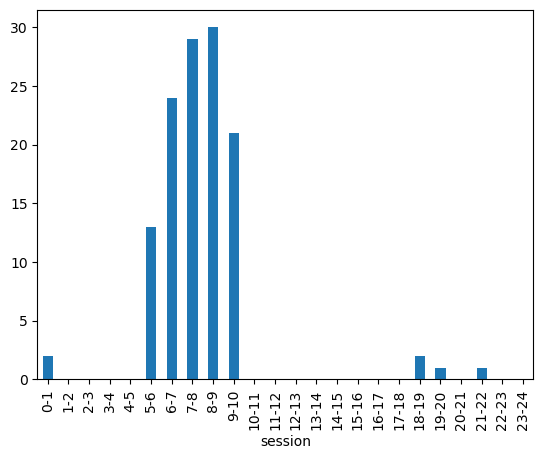

In [1024]:
six_nine = fasce_orarie(6, 9) # all
six_nine.plot.bar();

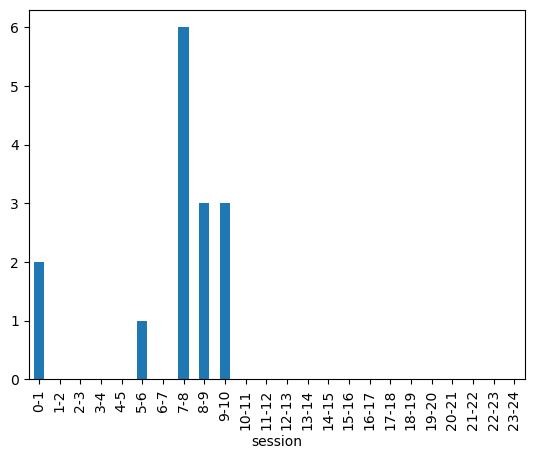

In [1025]:
six_nine2 = fasce_orarie(6, 9, day_of_week='Monday')
six_nine2.plot.bar();

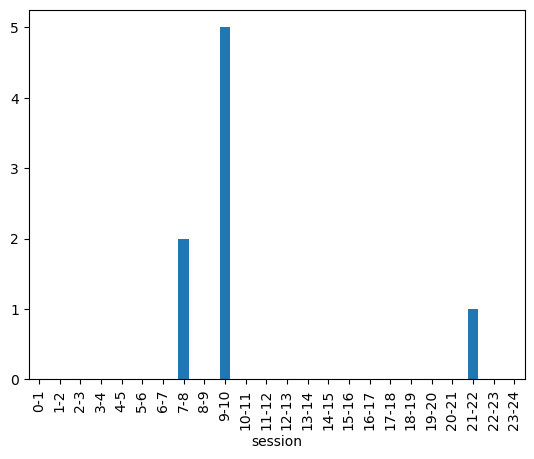

In [1027]:
six_nine3 = fasce_orarie(6, 9, day_of_week='Tuesday')
six_nine3.plot.bar();

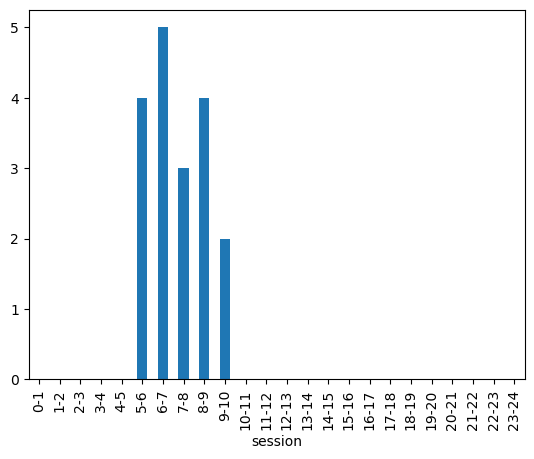

In [1029]:
six_nine4 = fasce_orarie(6, 9, day_of_week='Wednesday')
six_nine4.plot.bar();

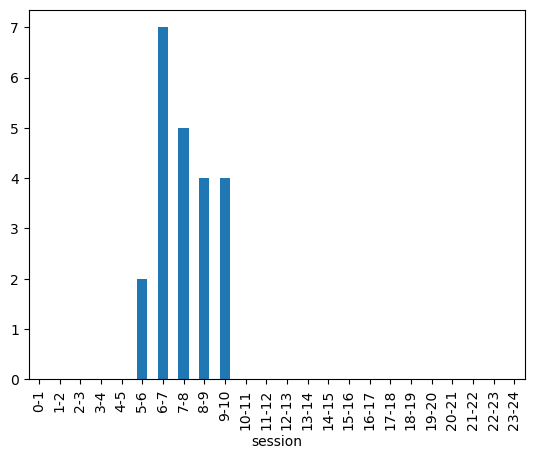

In [1031]:
six_nine5 = fasce_orarie(6, 9, day_of_week='Thursday')
six_nine5.plot.bar();

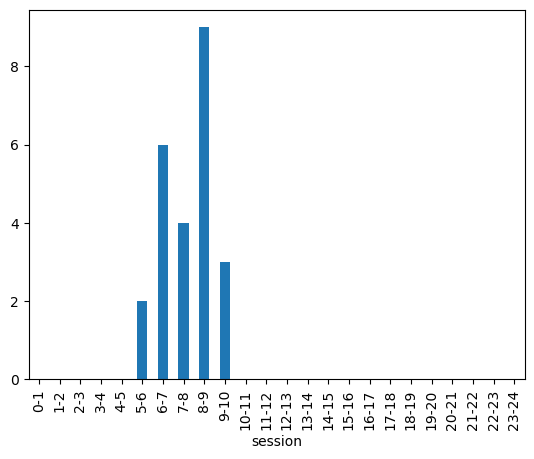

In [1033]:
six_nine6 = fasce_orarie(6, 9, day_of_week='Friday')
six_nine6.plot.bar();

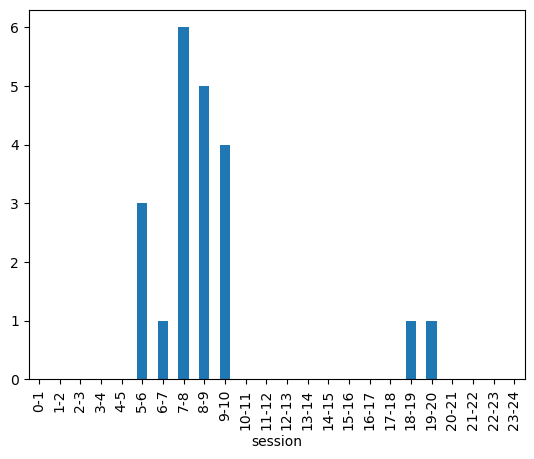

In [1034]:
six_nine7 = fasce_orarie(6, 9, day_of_week='Saturday')
six_nine7.plot.bar();

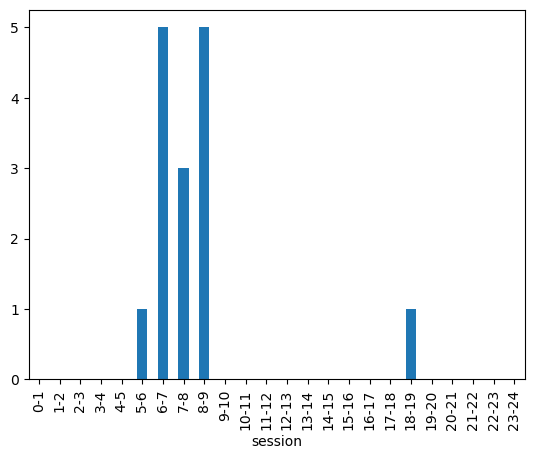

In [1036]:
six_nine8 = fasce_orarie(6, 9, day_of_week='Sunday')
six_nine8.plot.bar();

From here onwards, I just computed fasce orarie in general.

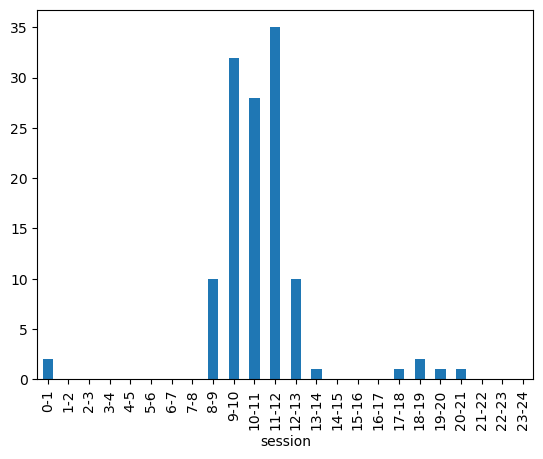

In [1040]:
nine_twelve = fasce_orarie(9, 12)
nine_twelve.plot.bar();

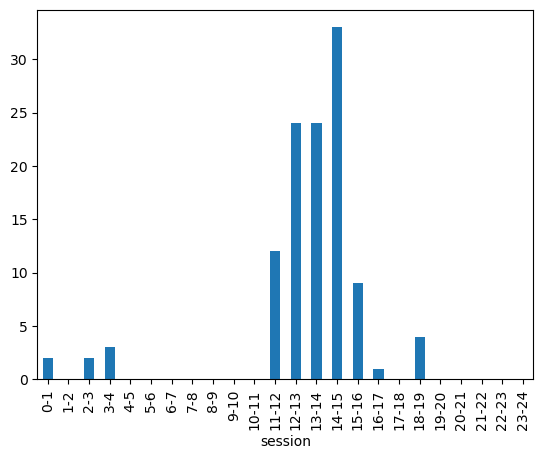

In [1042]:
twelve_fifteen = fasce_orarie(12, 15)
twelve_fifteen.plot.bar();

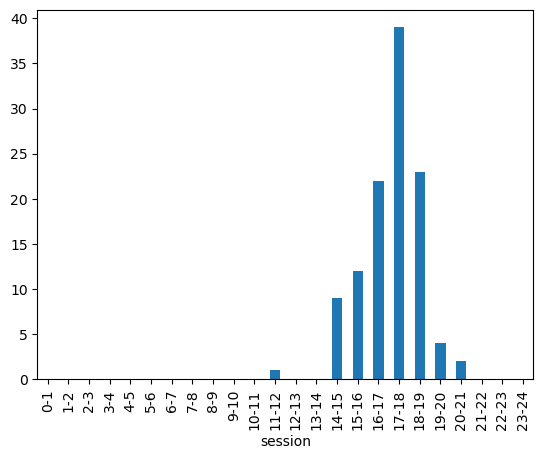

In [1043]:
fifteen_eighteen = fasce_orarie(15, 18)
fifteen_eighteen.plot.bar();

In [1045]:
from collections import defaultdict

# Initialize dictionary to store counts
campaign_stats = defaultdict(lambda: {'Received': 0, 'Sent': 0, 'DistinctOpens': set()})

# Process each row
for _, row in data.iterrows():
    campaign = row['CampaignName']
    event_name = row['EventName']
    hash_message = row['HashMessage']
    
    if pd.isna(row['EventDate']):
        continue
    
    if event_name == 'Received':
        campaign_stats[campaign]['DistinctOpens'].add(hash_message)
    elif event_name == 'Sent':
        campaign_stats[campaign]['Sent'] += 1

# Calculate final metrics
results = []
for campaign, stats in campaign_stats.items():
    distinct_opens = len(stats['DistinctOpens'])
    sent_count = stats['Sent']
    ratio = distinct_opens / sent_count if sent_count > 0 else float('nan')
    
    results.append({
        'CampaignName': campaign,
        'DistinctOpens': distinct_opens,
        'TotalSent': sent_count,
        'OpenToSentRatio': ratio
    })

# Convert to DataFrame
result_df = pd.DataFrame(results)
print(result_df.sort_values('OpenToSentRatio', ascending=False))

       CampaignName  DistinctOpens  TotalSent  OpenToSentRatio
2      Winter Promo            136        187         0.727273
3  Holiday Discount            142        197         0.720812
1      New Arrivals             94        136         0.691176
0        Flash Sale            122        177         0.689266


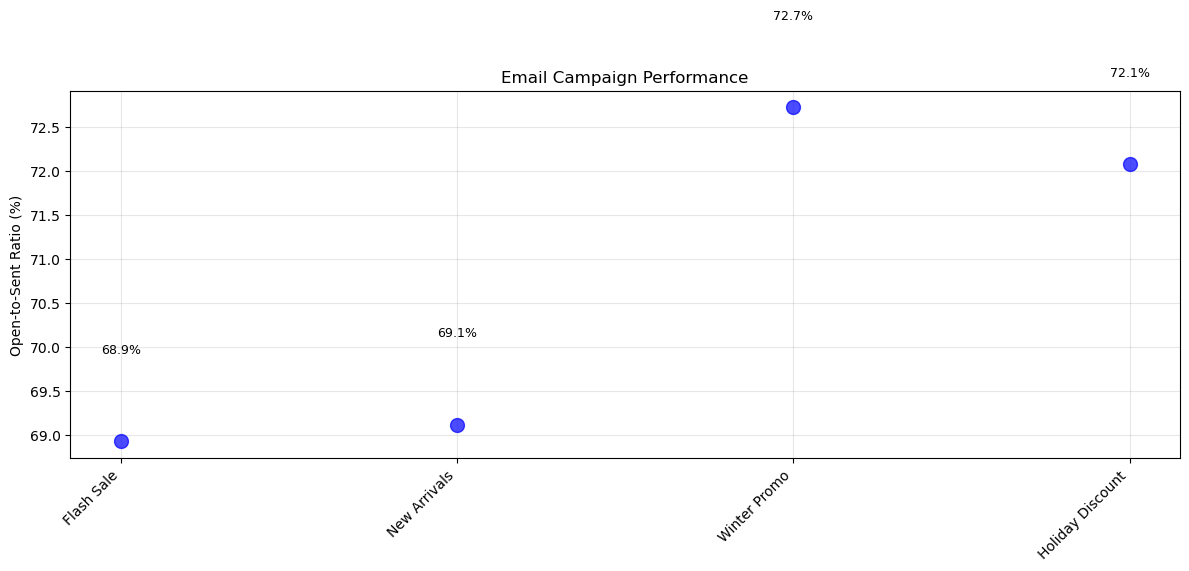

In [1048]:
plt.figure(figsize=(12, 6))

# Plot each campaign's ratio
plt.plot(
    range(len(result_df)), 
    result_df['OpenToSentRatio'] * 100,  # Convert to percentage
    'bo', 
    alpha=0.7,
    markersize=10
)

# Customize the plot
plt.xticks(
    range(len(result_df)),
    result_df['CampaignName'],
    rotation=45,
    ha='right'
)
plt.ylabel('Open-to-Sent Ratio (%)')
plt.title('Email Campaign Performance')
plt.grid(True, alpha=0.3)

# Add value labels above each point
for i, ratio in enumerate(result_df['OpenToSentRatio']):
    plt.text(
        i, 
        ratio * 100 + 1,  # Slightly above the point
        f'{ratio:.1%}', 
        ha='center',
        fontsize=9
    )

plt.tight_layout()
plt.show()

In [1051]:
dm = {}
for i in data["CommunicationName"].unique():
    if i not in dd:
        dm[i] = {'Sent': 0, 'Received': 0}

In [1053]:
hash_mex_for_open_distinct2 = []
for i in range(len(data)):
    if "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Received' and (data["HashMessage"][i] not in hash_mex_for_open_distinct2):
        dm[data["CommunicationName"][i]]['Received'] += 1
        hash_mex_for_open_distinct2.append(data["HashMessage"][i])
    elif "nan" not in str(data["EventDate"][i]) and str(data["EventName"][i]) == 'Sent':
        dm[data["CommunicationName"][i]]['Sent'] += 1
    else:
        pass

In [1055]:
list_percentage_open_divided_sent_per_comm = []
for i in dm.values():
    list_percentage_open_divided_sent_per_comm.append(i['Received'] / i['Sent']*100)

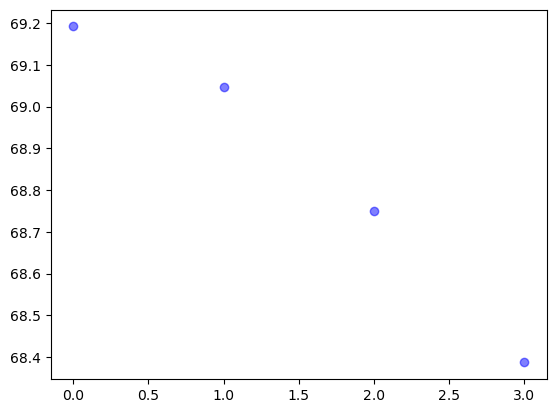

In [1057]:
plt.plot(range(0, len(list_percentage_open_divided_sent_per_comm)), list_percentage_open_divided_sent_per_comm, 'bo', alpha=0.5)
plt.show()

In [1059]:
day_of_week = []
for i in range(len(data)):
    day_of_week.append(pd.to_datetime(data["EventDate"][i], format='%Y-%m-%d %H:%M').day_name())
data['day_of_week'] = pd.DataFrame(day_of_week)

In [1061]:
d = {}
for i in data["day_of_week"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Received': 0}

In [1063]:
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EventName"][i]) == 'Sent':
        d[data["day_of_week"][i]]['Sent'] += 1
    elif (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContact'][i] + data['HashMessage'][i])
        d[data["day_of_week"][i]]['Received'] += 1
    else:
        pass

In [1065]:
list_percentage_open_divided_sent_per_comm = []
for i in d.values():
    if i['Sent'] > 0:
        list_percentage_open_divided_sent_per_comm.append(i['Received'] / i['Sent']*100)

In [1067]:
names = ['','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [1069]:
# Creating dataset
marks = np.array([23.4, 19.3, 21.4, 23.2, 0, 0, 0])

C:\Users\Mega Pc\AppData\Local\Temp\ipykernel_10888\3310927113.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right");


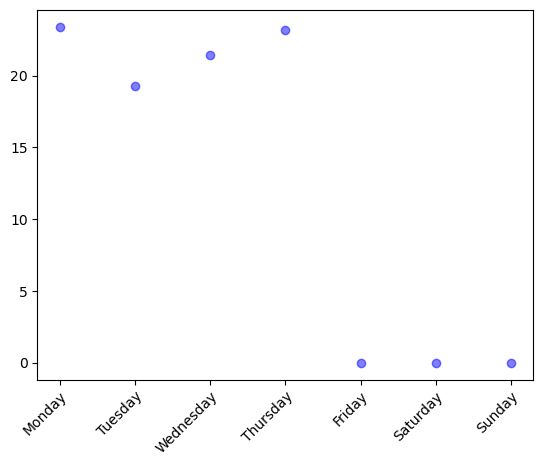

In [1071]:
ax = plt.subplot(111)
ax.plot(range(0, len(marks)), marks, 'bo', alpha=0.5)
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right");

In [1073]:
data["CampaignName"].unique() 

array(['Flash Sale', 'New Arrivals', 'Winter Promo', 'Holiday Discount'],
      dtype=object)

In [1075]:
d = {}
for i in data["day_of_week"].unique():
    if i not in d:
        d[i] = {'Sent': 0, 'Received': 0}

In [1077]:
# change 28 with the id of other campaigns to do the stats for the other campaign
# TODO: make a function of this with "CAMPAIGN.CAMPAIGN_ID" as parameter
list_contact_concatenated_mex  = []
for i in range(len(data)):
    if str(data["EventName"][i]) == 'Sent' :
        d[data["day_of_week"][i]]['Sent'] += 1
    elif (str(data["EventName"][i]) == 'Received') and (data['HashContact'][i] + data['HashMessage'][i] not in list_contact_concatenated_mex):
        list_contact_concatenated_mex.append(data['HashContact'][i] + data['HashMessage'][i])
        d[data["day_of_week"][i]]['Received'] += 1
    else:
        pass

In [1079]:
list_percentage_open_divided_sent_per_comm = []
for i in d.values():
    if i['Sent'] > 0:
        list_percentage_open_divided_sent_per_comm.append(i['Received'] / i['Sent']*100)

In [1081]:
d

{'Saturday': {'Sent': 129, 'Received': 93},
 'Sunday': {'Sent': 65, 'Received': 42},
 'Monday': {'Sent': 49, 'Received': 36},
 'Friday': {'Sent': 109, 'Received': 77},
 'Wednesday': {'Sent': 154, 'Received': 106},
 'Thursday': {'Sent': 133, 'Received': 100},
 'Tuesday': {'Sent': 58, 'Received': 41}}